In [1]:
import scipy as sc
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

from bs4 import BeautifulSoup
import requests
import re

In [2]:
def get_data_from_soup(input_soup):
    set = []
    soup_body = input_soup.body
    
    
    for tag in soup_body.find_all(class_="athing") :
        rank = int(tag.find(class_="rank").text[:-1])
        length = len(tag.find(class_="storylink").text)
    
        secondSection = tag.find_next_sibling()
    
        age = secondSection.find(class_="age").text
        if "hour" in age:
            age = int(age.split(" ")[0])
        elif "day" in age:
            age = int(age.split(" ")[0])*24
        elif "minute" in age:
            age = round(float(age.split(" ")[0])/60, 2)
        
        try:
            points = int(secondSection.find(class_="score").text.split(" ")[0])
        except:
            points = 0
            
        try:
            numComments = int(secondSection.find('a', text = re.compile('.*comments.*')).text.split('comments')[0].strip())
        except:
            numComments = 0
    
        set.append([rank, length, age, points, numComments])
    
    return set

In [3]:
set = []
numPages = 5;

for x in range(numPages):
    try:
        soup = BeautifulSoup(requests.get("https://news.ycombinator.com/news?p=" + str(x)).content, "html.parser")
        set += get_data_from_soup(soup)
    except requests.ConnectionError:
        print("No internet connection - closing...")
        exit()

# print(set)

In [4]:
df = pd.DataFrame(set, columns = ['Rank', 'TitleLen', "AgeHours", "Points", "NumComments"]) 

# print(df)

In [5]:
df.to_csv('hackerNews.csv', index = None, header=True)

In [6]:
df = pd.read_csv('hackerNews.csv')

# print(df)

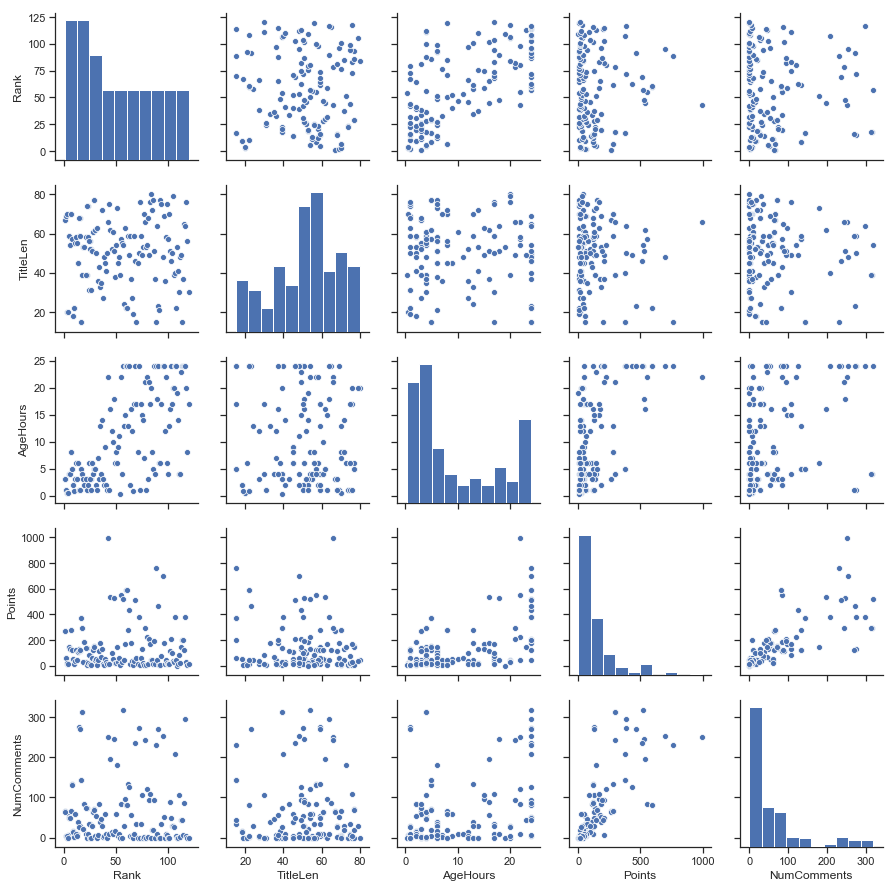

In [7]:
sns.set(style="ticks")
sns.pairplot(df);

**Nothing really obvious jumps out as a great predictor of rank...  Maybe age in hours has an inverse relationship?**

In [9]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     59.18
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.53e-29
Time:                        11:54:30   Log-Likelihood:                -677.94
No. Observations:                 150   AIC:                             1366.
Df Residuals:                     145   BIC:                             1381.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.1922      6.489      4.036      0.000      13.366      39.018
TitleLen       -0.0199      0.111     -0.180      0.857      -0.239       0.199
AgeHours        4.1577      0.271     15.344      0.000       3.622       4.693
Points         -0.1051      0.018     -5.692      0.000      -0.142      -0.069
NumComments     0.0200      0.035      0.571      0.569      -0.049       0.089
==============================================================================
Omnibus:                       30.133   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.832
Skew:                           1.171   Prob(JB):                     1.36e-09
Kurtosis:                       4.023   Cond. No.                         827.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Taking everything together gives an r-squared of .619 which is not fantastic, but probably not nothing either.**

**It appears that TitleLen and NumComments don't have much bearing on the rank**

In [16]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     79.16
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.85e-30
Time:                        12:18:15   Log-Likelihood:                -678.11
No. Observations:                 150   AIC:                             1364.
Df Residuals:                     146   BIC:                             1376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2569      6.473      4.056      0.000      13.463      39.051
TitleLen      -0.0156      0.110     -0.141      0.888      -0.234       0.202
AgeHours       4.1479      0.270     15.374      0.000       3.615       4.681
Points        -0.0976      0.013     -7.516      0.000      -0.123      -0.072
==============================================================================
Omnibus:                       29.607   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.848
Skew:                           1.156   Prob(JB):                     2.22e-09
Kurtosis:                       4.017   Cond. No.                         768.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     79.42
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.60e-30
Time:                        12:17:58   Log-Likelihood:                -677.96
No. Observations:                 150   AIC:                             1364.
Df Residuals:                     146   BIC:                             1376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.1459      2.876      8.743      0.000      19.461      30.830
AgeHours        4.1579      0.270     15.396      0.000       3.624       4.692
Points         -0.1047      0.018     -5.728      0.000      -0.141      -0.069
NumComments     0.0196      0.035      0.562      0.575      -0.049       0.088
==============================================================================
Omnibus:                       30.223   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.024
Skew:                           1.172   Prob(JB):                     1.24e-09
Kurtosis:                       4.035   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Both NumComments and TitleLen appear to have very high P values, even when taken independently - they should be removed from the model**

In [13]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.51e-31
Time:                        11:59:26   Log-Likelihood:                -678.12
No. Observations:                 150   AIC:                             1362.
Df Residuals:                     147   BIC:                             1371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4334      2.824      9.007      0.000      19.853      31.014
AgeHours       4.1482      0.269     15.427      0.000       3.617       4.680
Points        -0.0974      0.013     -7.561      0.000      -0.123      -0.072
==============================================================================
Omnibus:                       29.694   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.031
Skew:                           1.156   Prob(JB):                     2.03e-09
Kurtosis:                       4.028   Cond. No.                         333.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After removing TitleLen and NumComments our r-squared barely changed**

**It seems like rank is based off of its age in hours (with a strong positive correlation) and its number of points (with a weaker negative correlation).  As time goes on it gets dramatically harder for post to maintain itself on the front page.**

**This seems like far and away the best model of the ones we tried and it seems like both of the variables have a relationship to rank, even if ageHours is much stronger**